<a href="https://colab.research.google.com/github/shahdevansh28/ML/blob/main/ML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab-5_1

In [3]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']


#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
#Outlook
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
#Temperature
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
#Humidity
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
#Wind
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
#Class label
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [5]:
#Merge different features to prepare dataset
features=tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features:",features)

Features: ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


In [6]:
regressor = DecisionTreeClassifier(criterion='entropy') 
  
# fit the regressor with X and Y data
#regressor.fit(features, Play_encoded)

path = regressor.cost_complexity_pruning_path(features, Play_encoded)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.12891573 0.12891573 0.19862279 0.22600024]


In [7]:
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file ='tree.dot',feature_names=['outlook','temperature','humidity','wind'],class_names=['play_no','play_yes'],filled=True)

NotFittedError: ignored

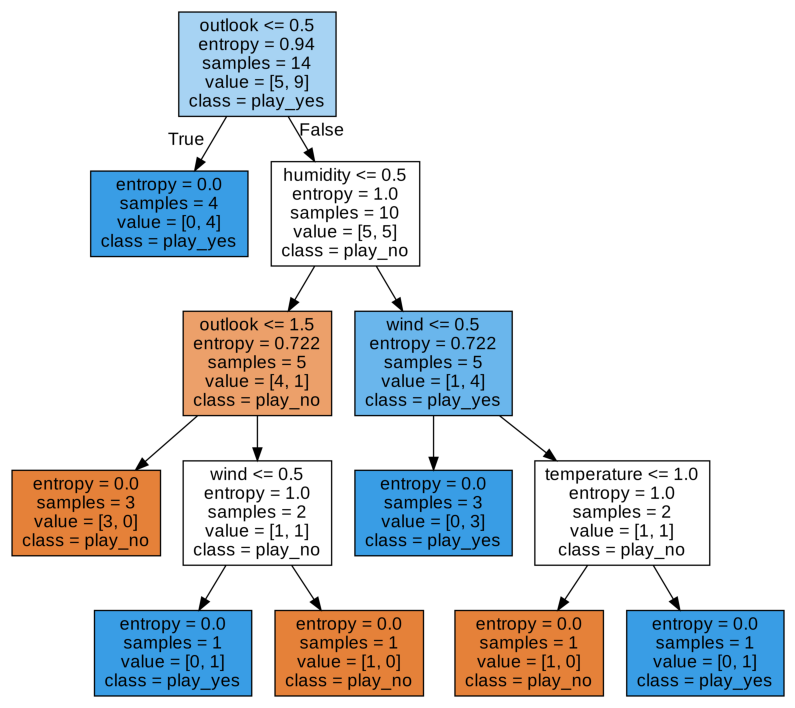

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

[0.         0.01836592 0.01836592 0.02797049 0.04675016 0.07674136
 0.46010691 0.91829583]
Number of nodes in the last tree is: 1 with ccp_alpha: 0.9182958340544894


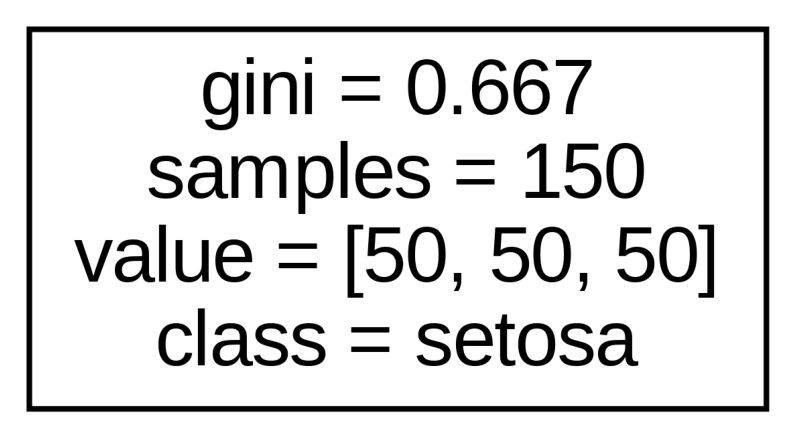

In [8]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()
#print(iris)
features = iris.data
label = iris.target
#print(features)
#print(iris.target)
regressor = DecisionTreeClassifier(criterion='entropy') 
path = regressor.cost_complexity_pruning_path(iris.data, iris.target)
# fit the regressor with X and Y data
regressor.fit(features, label)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

#from sklearn.tree import export_graphviz
#export_graphviz(regressor, out_file ='tree_2.dot',feature_names=['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],class_names=['setosa','versicolor','virginica'],filled=True)
#from subprocess import call
#call(['dot', '-Tpng', 'tree_2.dot', '-o', 'tree_entropy_2.png','-Gdpi=600'])
# Display in python
#import matplotlib.pyplot as plt
#plt.figure(figsize = (14, 18))
#plt.imshow(plt.imread('tree_entropy_2.png'))
#plt.axis('off');
#plt.show();
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
  clf.fit(iris.data, iris.target)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

from sklearn.tree import export_graphviz
export_graphviz(clf, out_file ='tree_3.dot',feature_names=['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],class_names=['setosa','versicolor','virginica'],filled=True)
from subprocess import call
call(['dot', '-Tpng', 'tree_3.dot', '-o', 'tree_entropy_3.png','-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy_3.png'))
plt.axis('off');
plt.show();

Lab-5_2

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]


Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


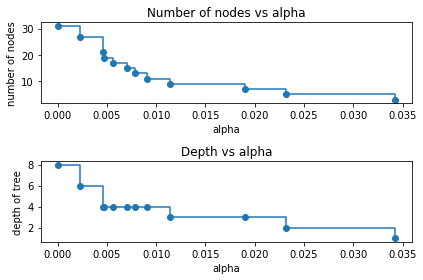

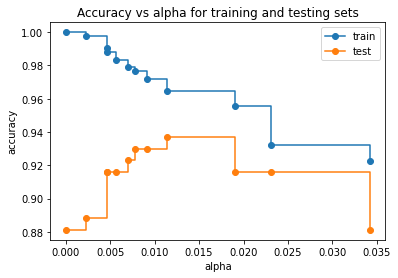

In [10]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()